In [23]:
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.colors import LogNorm

import os
from collections import namedtuple


In [3]:
def trackCut(df):
    ''' Select events with at least one longish track'''
    a = df.groupby('Event').filter(lambda df: df.Track.sum()>10 )
    return a


In [6]:
# trackCut was already performed to the .root file

ht = pd.read_csv("../data/raw/hit_info_v2_physics.0007.00930.HLT5.f00000.csv.gz")

In [7]:
# radii and phi coordinates of CDC wires (for stereo wires: use Z=0)
ht['R'] = np.sqrt(ht.X**2+ht.Y**2)
ht['Phi'] = np.arctan2(ht.Y, ht.X)


In [8]:
# List of event numbers:
E = np.sort(np.array(list(set(ht.Event))))
#ht['BoardId'] = 0

In [9]:
def DrawCDCSuperLayerXY():
    '''Draw boundaries of CDC superlayers'''
    SuperLayerBoundary = [16.8, 25.7, 36.5, 47.6, 58.4, 69.5, 80.2, 91.3, 102.1, 111.1 ]
    ax = plt.gca()
    cols = ["b","r"]
    i = 0
    for r in SuperLayerBoundary:
        circle1 = plt.Circle((0, 0), r, color=cols[i % 2],fill=False)
        ax.add_artist(circle1)
        i += 1

In [10]:
def drawEv(x,y,z,cmap=None,norm=None):
    plt.xlim(-120.,120.)
    plt.ylim(-120.,120.)
    DrawCDCSuperLayerXY()
    #h = plt.hist2d(X,Y,120,[[-120.,120.],[-120.,120.]],norm=LogNorm())
    #plt.scatter(X,Y,c=ht[c].Charge,vmax=0.00005)#,norm=LogNorm())
    #plt.scatter(X,Y,c=ht[c].Time) #,norm=LogNorm())
    plt.scatter(x,y, c=z,  cmap=cmap, marker='.', norm=norm)
    plt.colorbar()
    plt.xlabel("X / cm")
    plt.ylabel("Y /cm ")
    

Event =  8
Event =  13
Event =  23
Event =  33
Event =  38


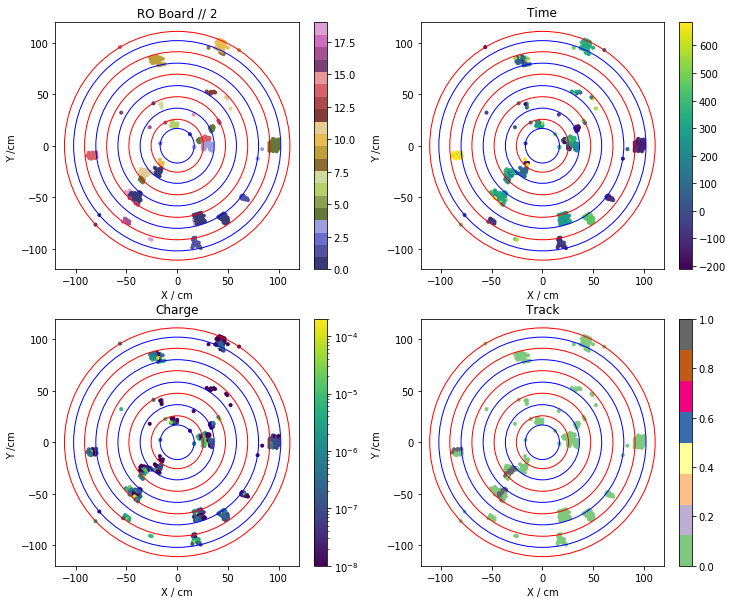

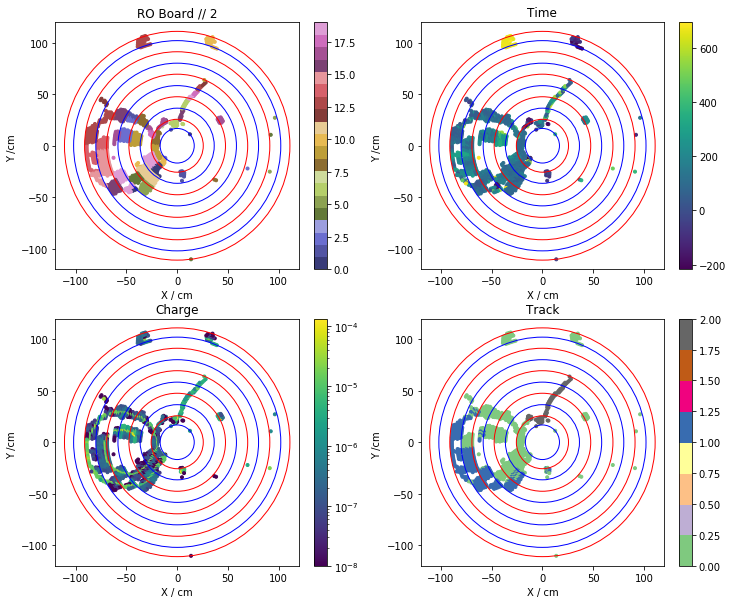

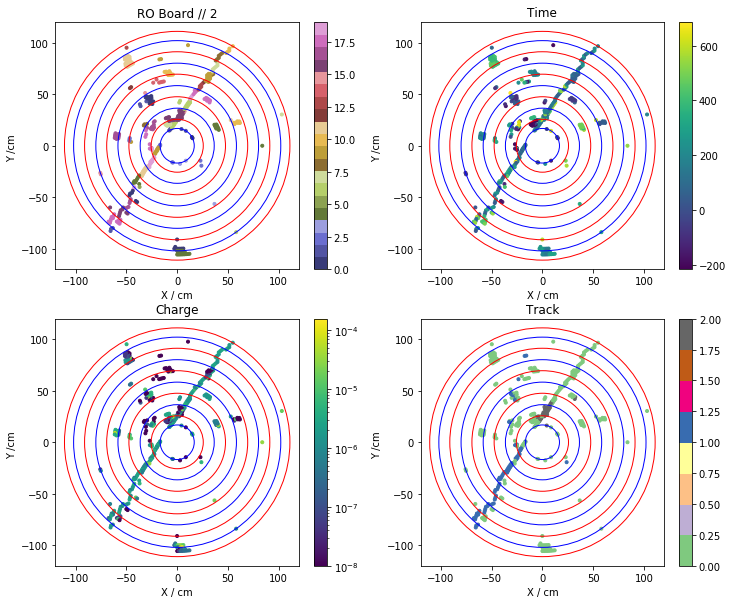

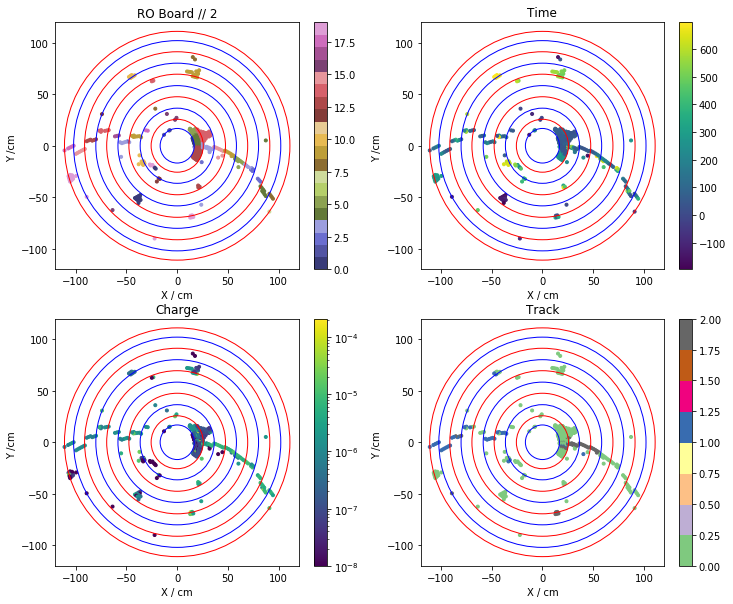

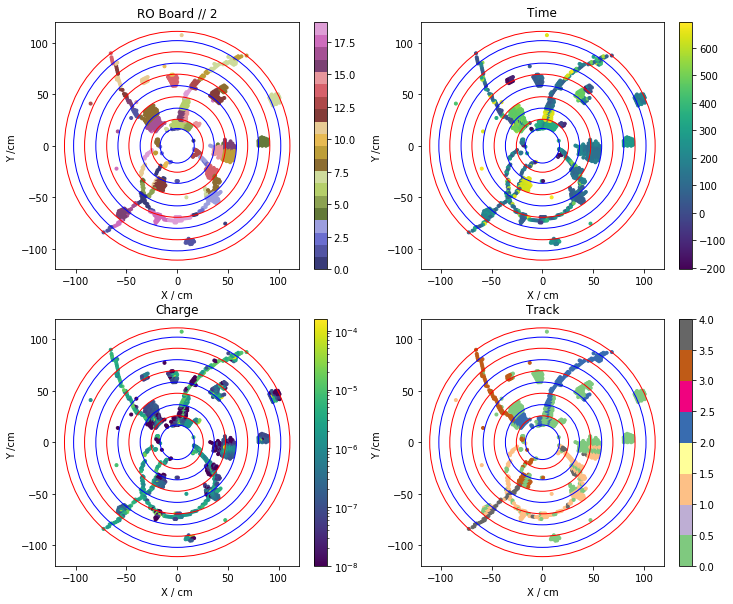

In [11]:
pdf = PdfPages("events.pdf")
for ev in E[:5]:
    print ("Event = ",ev)
    c = (ht.Event == ev) & (ht.Time > -1000) 
    # cut 1
    # c = c & (ht.bgFlag == 0) & (ht.xTalk == 0) 
    # cut 2
    # c = c & (ht.Track > 0) & (ht.Charge > 0.6e-6)
    # cut 3
    # c = c & (ht.BoardId // 2 == 77 // 2)
    X, Y = ht[c].X.values, ht[c].Y.values
    if len(X) == 0:
        print(f"Event {ev}, len(x) = 0")
        continue
        
    plt.figure(figsize=(12,10))
    plt.title(f"Event = {ev}")

    plt.subplot(221)
    # Board IDs
    drawEv(X, Y, ht[c].BoardId // 2 % 20, plt.get_cmap('tab20b'))
    plt.title('RO Board // 2')
    
    # Time
    plt.subplot(222)
    drawEv(X, Y, ht[c].Time)
    plt.title('Time')
    
    # ADC
    plt.subplot(223)
    drawEv(X, Y, np.where(ht[c].Charge > 0,
                          ht[c].Charge, 1e-8),
           norm=LogNorm()) 
    plt.title('Charge')
    
    # TOT
    plt.subplot(224)
    drawEv(X, Y, ht[c].Track, plt.get_cmap('Accent'))
#    drawEv(X,Y,ht[c].TOT ) #,plt.get_cmap('Accent')) why not?
    plt.title('Track')
#    plt.savefig("event_x.pdf")
    pdf.savefig()
    plt.savefig("ev_old.png")
pdf.close()

In [41]:
Смоделировать рннкой параметры гауссиан, с вертью альфа н голов, 

рисует красками и учится рлем

spiral, spiral ++

draw

set-transformer (без эмбеддингов)

Point-cloud generation

факторизуешь на условное, модель факторизации

SyntaxError: invalid syntax (<ipython-input-41-3132c12dc5a8>, line 1)